In [1]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn 
import datetime as dt
import requests
import json
import math
import glob
import cufflinks as cf
import scipy.stats




In [2]:
url= 'https://raw.githubusercontent.com/laraccano84/Mentoria_mumuki/main/DiploDatos_Mentoria_Mumiki_G2/DataSet_Mumuki_Outliers.csv'
df_mumuki= pd.read_csv(url)

In [3]:
sns  = seaborn

In [4]:
df_mumuki

,Unnamed: 0,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,Estatus,Date,Periodo,Year,Month,Week,DayNroWeek,DayNameWeek,Time,Hora,Minute,lesson_number,exercise_index_per_lesson,id_exercise,created_at
0,0,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",paso,2019-08-30,2019-08,2019,8,35,4,Friday,13:17:17.700000,13,17,1,1,1,2019-08-30 13:17:17.700
1,1,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",paso,2019-09-04,2019-09,2019,9,36,2,Wednesday,01:29:22.351000,1,29,1,1,1,2019-09-04 01:29:22.351
2,2,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",no_paso,2019-09-04,2019-09,2019,9,36,2,Wednesday,02:53:01.099000,2,53,1,1,1,2019-09-04 02:53:01.099
3,3,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3,78,def Mitas(numero):\r\n return numero / 2\r\n,2019-09-04 02:53:24.673,failed,1,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",no_paso,2019-09-04,2019-09,2019,9,36,2,Wednesday,02:53:24.673000,2,53,1,1,1,2019-09-04 02:53:24.673
4,4,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,4,78,def mitad (numero):\r\n return numero / 2\r\n,2019-09-04 02:53:41.949,passed,2,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",paso,2019-09-04,2019-09,2019,9,36,2,Wednesday,02:53:41.949000,2,53,1,1,1,2019-09-04 02:53:41.949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42780,47094,Esto no tiene valor,[],mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,348,NaN,2020-11-08 22:03:56.946,passed,0,NaN,paso,2020-11-08,2020-11,2020,11,45,6,Sunday,22:03:56.946000,22,3,3,8,37,2020-11-08 22:03:56.946
42781,47095,Esto no tiene valor,[],mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,351,NaN,2020-11-12 11:10:08.054,passed,0,NaN,paso,2020-11-12,2020-11,2020,11,46,3,Thursday,11:10:08.054000,11,10,3,8,37,2020-11-12 11:10:08.054
42782,47096,Esto no tiene valor,[],mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,316,NaN,2020-11-12 13:56:29.344,passed,0,NaN,paso,2020-11-12,2020-11,2020,11,46,3,Thursday,13:56:29.344000,13,56,3,8,37,2020-11-12 13:56:29.344
42783,47097,Esto no tiene valor,[],mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,347,NaN,2020-11-16 18:22:54.768,passed,0,NaN,paso,2020-11-16,2020-11,2020,11,47,0,Monday,18:22:54.768000,18,22,3,8,37,2020-11-16 18:22:54.768


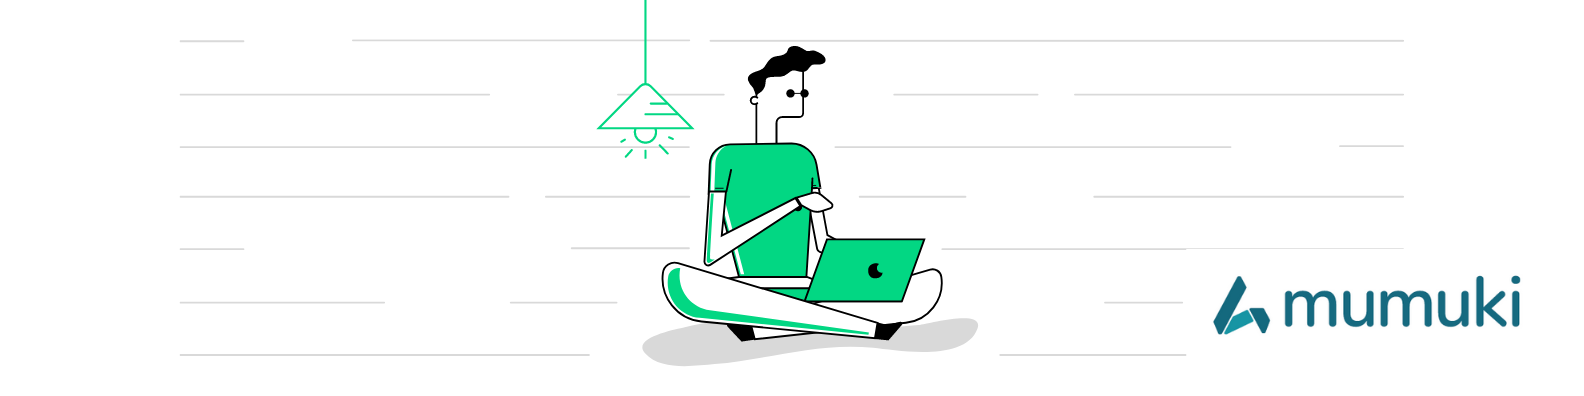

En presente trabajo tiene como objetivo analizar las posibles causas de deserción estudiantil en el marco de una plataforma educativa para aprender a programar.
Para ello se plantearon los siguientes pasos:
NOTEBOOK 1
1. Caracterización del set de datos.
2. Selección de las variables de estudio acorde al objetivo planteado.
3. Modificaciones en el data set
4. Analisis y eliminación de outliers. 

NOTEBOOK 2
1. Analisis  y visualizacion de las variables seleccionadas.
2. Plateo de grupos según comportamiento frente a los envios.
3. Resultados encontrados en cada grupo.

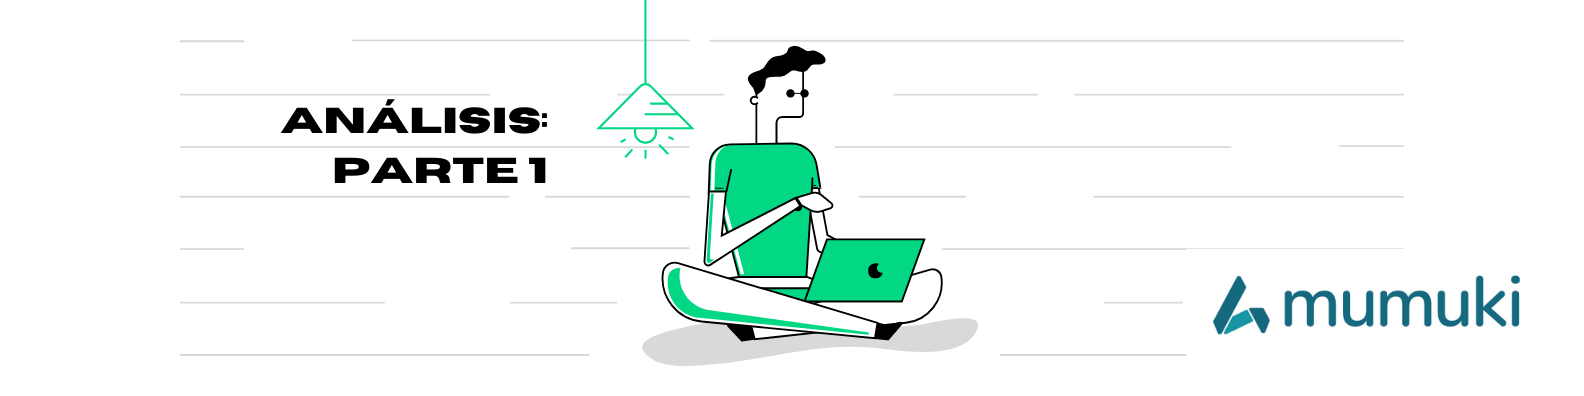


PARTE 1

Analizar las variables categoricas que seleccionamos, con el objetivo que nos permitan entender el comportamiento estudiantil y las causas de deserción. 

Columnas seleccionadas:
 

*   Estatus
*   ejercise_name
*   ejercise_id
*   exercise_index_per_lesson
*   submission_create_at, que se segmento en las columnas: periodo,  día y horas, del dataframe modificado del original (ver notebook con la explicación de las modificaciones). 

Análisis: 
En esta primera parte queremos conocer las siguientes mediciones con el objetivo de conocer los tipos de ejercicios y el comportamiento de los alumnos:
1. Calcular la cantidad de envios correctos e incorrectos. 
2. Calcular la cantidad de envios correctos como de los incorrectos por ejercicio. 
3. Identificar los ejercicios con mayor cantidad y promedio de envios correctos que incorrectos y viceversa para poder clasificarlos en ejercicios faciles vs dificiles. 
4. Cantidad de intentos (totales, correctos y/o fallidos) y cantidad de ejercicios realizados por persona.
5. Tiempo invertido en el recorrido por persona. 
6. Tiempo invertido entre envios por estudiante.




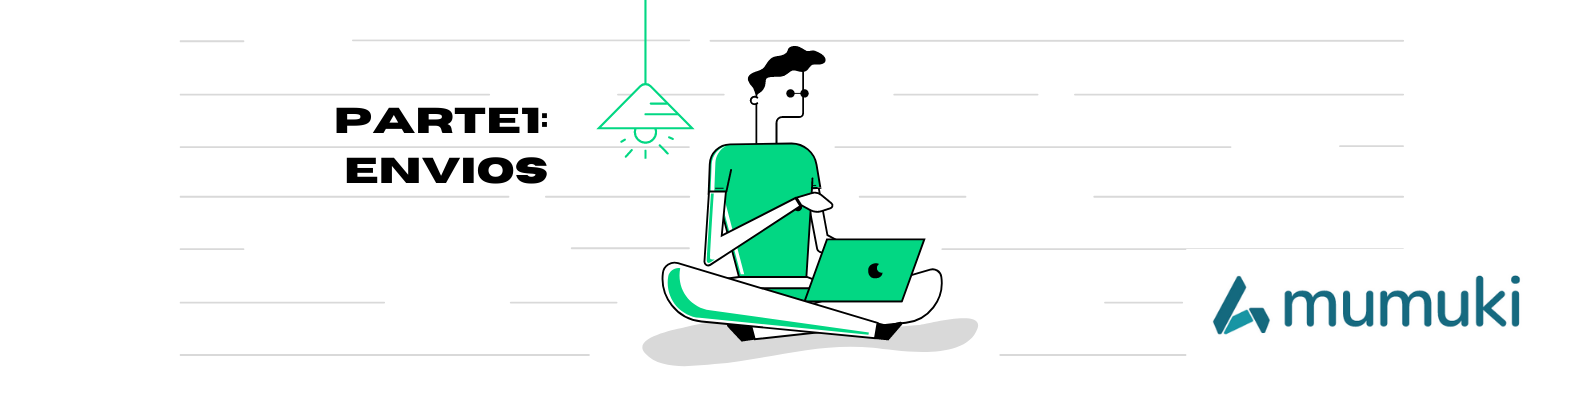

Para poder realizar el calculo de estadisticos vamos a proceder a realizar el  siguiente cambio:
1. Vamos a crear una columna llamada Estatus_numerico con el fin de poder realizar calculos de disntitos estadisticos, donde el Estatus paso es igual a 1 y no paso es 0.

In [5]:
def set_grupo_estatus(Estatus):
  if (Estatus == ('paso')):
        return 1
  if (Estatus == ('no_paso')):
        return 0


In [6]:
df_mumuki['Estatus_numerico'] = df_mumuki['Estatus'].apply(set_grupo_estatus)




# **1. Calcular la cantidad de envios correctos e incorrectos. **

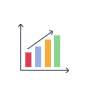Para analizar la cantidad de envios vamos a seleccionar la columna **Estatus** que se creo anteriormente y vamos a utilizar la función count.



In [7]:
cantidad_envio = df_mumuki['Estatus'].value_counts() 
print(cantidad_envio) 

no_paso    29944
paso       12841
Name: Estatus, dtype: int64


## ***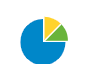Grafica de los porcentajes de los envios por Estatus. ***

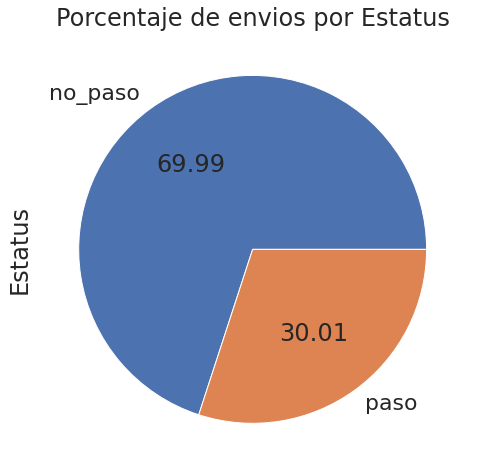

In [56]:
#Grafica del promedio del estatus de los ejercicios
sns.set(font_scale = 2)
plot = df_mumuki['Estatus'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(8, 8),
                                            title='Porcentaje de envios por Estatus')


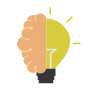# **Conclusión:**
Se puede concluir que la mayor cantidad de envios son incorrectos, de hecho la cantidad de envios incorrectos es 2.33 veces más frecuente que la cantidad de envios correctos. Si sabemos que el recorrido completo tiene 40 ejercicios, podemos concluir que existen alumnos que realizan varios intentos por ejercicios hasta lograr aprobarlo. A continuación queremos identificar que ejercicios son más dificiles que otros, segun el comportamiento de los estudiantes. Partimos de la premisa que aquellos ejercicios dificiles tienen mayor cantidad de envios incorrectos que correctos por parte de los alumnos.

# **2. Calcular la cantidad de envios correctos como de los incorrectos por ejercicio. **

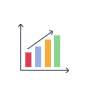 Se procede a calcular la Cantidad de los envios correctos e incorrectos por cada ejercicio, ordenados por número de lección y orden natural de aparición.

In [10]:
df_estatus_ejercicio=df_mumuki.groupby(['lesson_number','id_exercise','exercise_name', 'Estatus'])['Estatus'].count().unstack()
df_estatus_ejercicio

Estatus                                                              no_paso    paso
lesson_number id_exercise exercise_name                                             
1             1           Funciones, declaración / No tan distintos    982.0   505.0
              2           Funciones, uso                               852.0   266.0
              3           Probando funciones                             NaN   833.0
              4           Haciendo cuentas                               NaN  1818.0
              5           Calefones / Poniendo topes                   970.0   258.0
              6           Libros de la buena memoria                   937.0   255.0
              7           Booleanos                                    920.0   241.0
              8           Palabras, sólo palabras                     2154.0   231.0
              9           Operando strings                            1770.0   241.0
              10          ¡GRITAR!                                    1130.0   227.0
              11          ¿Y qué tal si...?                            627.0   220.0
              12          ¿De qué signo sos?                          1203.0   223.0
              13          El retorno del booleano                     1122.0   230.0
              14          Los premios                                  934.0   216.0
              15          Tipos de datos / Datos de todo tipo         1002.0  1423.0
2             16          Comprando Hardware                           522.0   219.0
              17          ¿Me conviene?                               1637.0   201.0
              18          Triangulos                                   413.0   207.0
              19          Cuadrados                                    343.0   207.0
              20          ¿Está afinado?                               321.0   204.0
              21          ¿Está cerca?                                 879.0   200.0
              22          Cartelitos                                  1167.0   214.0
              23          Más Cartelitos                              1617.0   217.0
              24          Cartelitos óptimos                          1304.0   186.0
              25          Cara o ceca                                  607.0   195.0
              26          ¡Envido!                                     515.0   198.0
              27          ¡Quiero retruco!                             821.0   181.0
              28          ¡Quiero vale cuatro!                         332.0   183.0
3             29          ¿Y el tablero?                                 NaN   481.0
              30          Impresión por pantalla                         NaN   487.0
              31          Martin Fierro                                886.0   183.0
              32          ¿Y los procedimientos?                        33.0   189.0
              33          ¿Y el program?                                19.0   204.0
              34          Conversiones                                1175.0   198.0
              35          El círculo de la vida                        454.0   191.0
              36          Pienso que así es más fácil                  139.0   185.0
              37          Esto no tiene valor                            NaN   357.0
              38          Variables globales                           985.0   184.0
              39          Volviéndonos ricos                           880.0   192.0
              40          ¿Y esto cuánto vale?                         292.0   191.0

# *3. Identificar los ejercicios con mayor cantidad y promedio de envios correctos que incorrectos y viceversa para poder clasificarlos en ejercicios faciles vs dificiles.*

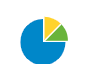 **Realizamos un gráfico de barra para identificar  aquellos ejercicios que puedan resultar más faciles de aquellos más dificiles** Aclaración: Se entiede por faciles aquellos ejercicios con total de envios correctos o mayor cantidad de envios correctos que incorrectos y viceversa se entiende como ejercicios dificiles. 

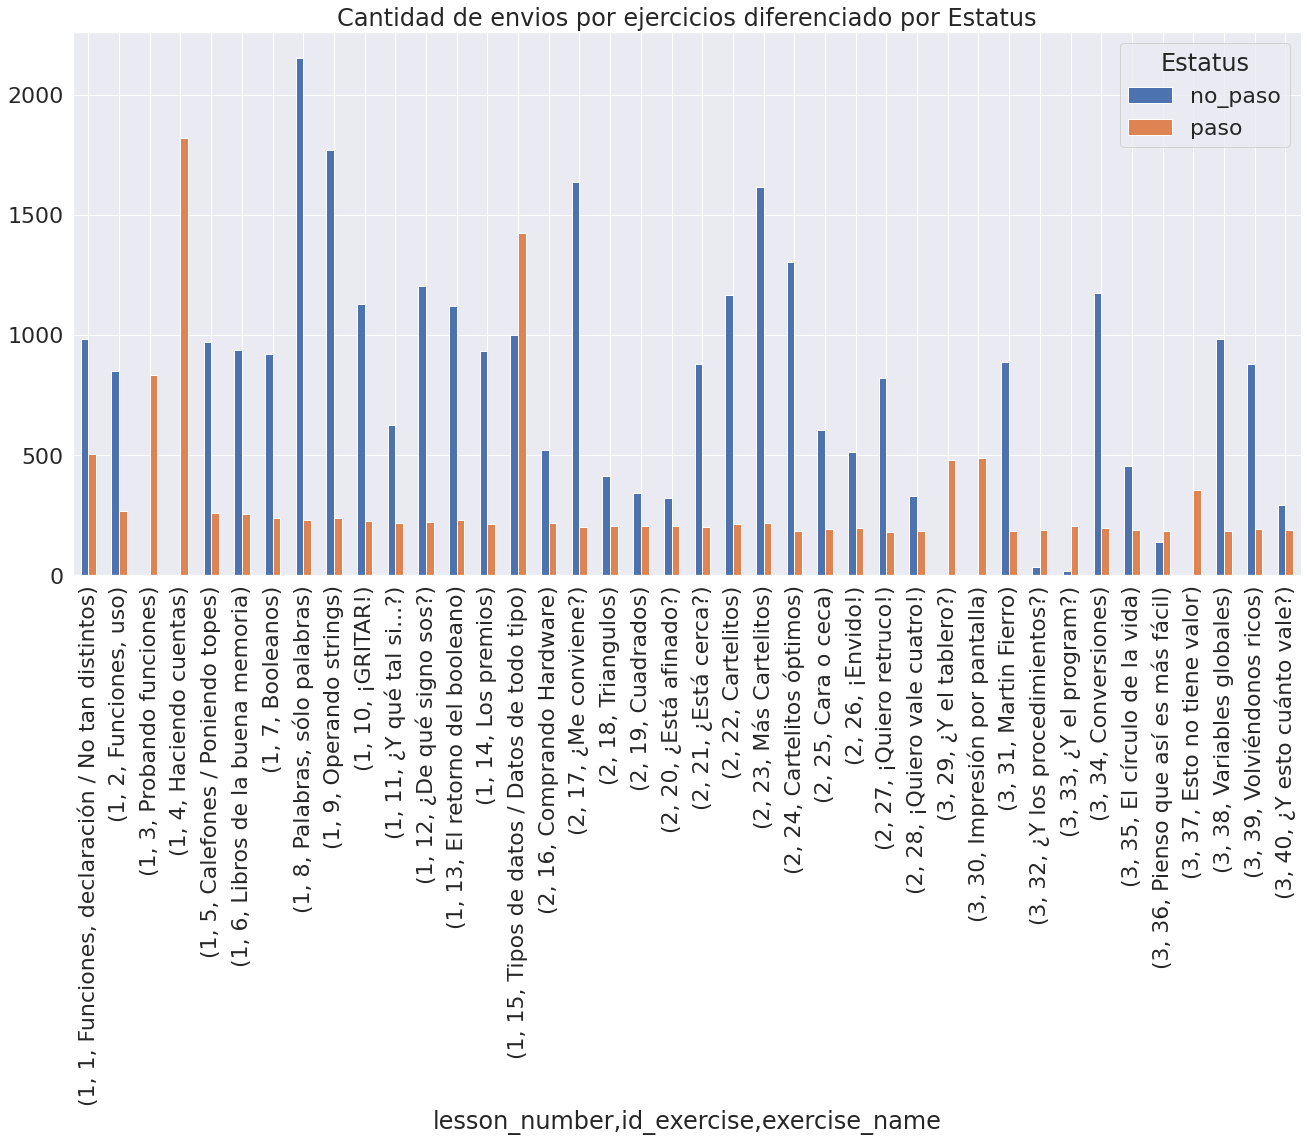

In [11]:
df_estatus_ejercicio.plot.bar(figsize=(22,10), title='Cantidad de envios por ejercicios diferenciado por Estatus')

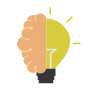 **Conclusión:** 
Se puede identificar que los ejercicio "Haciendo cuentas", "Probando funciones", "y el tablero" , "Impresion por pantalla" y "Esto no tiene valor" tienen envios solo con estatus paso, lo que nos permite suponer que son ejercicios fáciles. En el otro extremo el ejercicio "Palabras solo palabras" tiene una mayor cantidad de envios incrorrectos, seguido de "Operando Strings", "Más cartelitos" y "me conviene". Esta identificaciones va a ser últil para futuros análisis, como por ejemplo cantidad de alumnos que no realizan más ejercicios cuando llegan a estos dificiles o bien cantidad de alumnos que aprueban respectos al total de alumnos que realizaron envios. 
También se puede identificar que la mayoria de los ejercicios tienen mas envios incorrectos que correctos, lo que nos permite suponer que para algunos alumnos el recorrido de las distintas lecciones requiere cierto esfuerzo. 
Respecto a la cantidad de intentos observamos que disminuye al avanzar la cantidad de ejercicios por lección lo que nos genera dos supuestos: 1. Disminuye la cantidad de alumnos en la plataforma. 2. Los alumnos son mas acertivos en sus intentos, lo que implica menos envios. Por último se puede observar en la lección 3 encontramos mayor cantidad de ejercicios con envios correctos sobre la cantidad de envios incorrectos, esto nos genera la siguiente incertidumbre, Los alumnos que llegan a la lección 3 tienen una mayor probabilidad de realizar envios exitos que los que no llegaron?

# *4. Cantidad de intentos (totales, correctos y/o fallidos) y cantidad de ejercicios realizados por persona.*

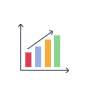 A continuación vamos a analizar la cantidad de envios por estudiantes y la cantidad de ejercicios, **distintos**, que intento resolver el estudiante con al menos un envio. Para ello se seleccionan las variables student_uid y se contabiliza la cantidad de envios totales, como únicos. Luego se procede a obtener datos estadisticos de los mismos. 

Con estos datos queremos conocer el cantidad de envios correctos vs incorrectos de los alumnos, para entender su comportamiento y quienes intentaron resolver todos los ejercicios de quienes no.

Se definio como recorrido completo a la realización de envios en todos los ejercicios por parte del alumno, indiferente del estatus.
Si no completo al menos un envío en cada ejercicio, vamos a considerar que el mismo abandono.



In [12]:
df_envios=df_mumuki.groupby(['student_uid'], as_index=True).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x)))}).rename(columns={'id_exercise':'Cantidad_Envios','exercise_name':'Ejercicios_unicos', "student_uid": 'UID del estudiante'})
df_envios

,Cantidad_Envios,Ejercicios_unicos
student_uid,,
76,89,36
77,186,40
78,84,9
79,95,22
80,125,19
...,...,...
355,15,8
358,6,1
359,38,16


In [13]:
df_envios.describe()

,Cantidad_Envios,Ejercicios_unicos
count,272.000000,272.000000
mean,157.297794,31.246324
std,92.938675,13.252375
min,3.000000,1.000000
25%,85.750000,22.750000
50%,147.000000,40.000000
75%,217.250000,40.000000
max,391.000000,40.000000


Se agrega al dataframe anterior una columna para cuantificar los alumnos que intentaron realizar los 40 ejercicios de los que no. 

In [61]:
def set_grupo_ejercicio_unico(Ejercicios_unicos):
  if (Ejercicios_unicos == 40):
        return 'Completo'
  else:
        return "Deserto"

In [92]:
df_mumuki['Avance'] = df_envios['Ejercicios_unicos'].apply(set_grupo_ejercicio_unico)


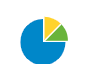 *Grafico:* A continuación se realiza un gráfico de torta para visualizar el porcentaje de alumnos que intentaron resolver los 40 ejercicios de los que no.

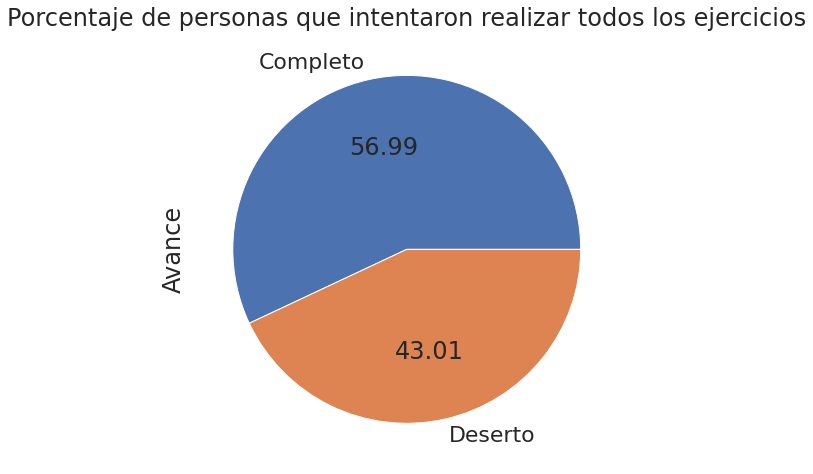

In [93]:
sns.set(font_scale = 2)
plot = df_mumuki['Avance'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(8, 8),
                                            title='Porcentaje de personas que intentaron realizar todos los ejercicios')


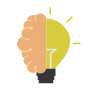 **Conclusión**: El promedio de envios realizados es de 157 envios por alumnos con un desvio de 93. El promedio de ejercicios distintos que al menos tienen un envio es de 31 con un desvio de 13. Respecto al patrón de envios se puede observar que se pueden diferenciar dos grupos, quienes tienen mayor cantidad de envios correctos que incorrectos y viceversa.  

Por otro lado se puede observar que el 57% de los estudiantes realizan envios en todos los ejercicios lo que nos permite suponer es que esta cantidad de alumnos no abandona el recorrido en mumuki, el otro 43% realiza menos de esa cantidad y no completan el recorrido. Este es un grupo heterogeneo en su comportamiento y a futuro merecen un analisis detallado. 

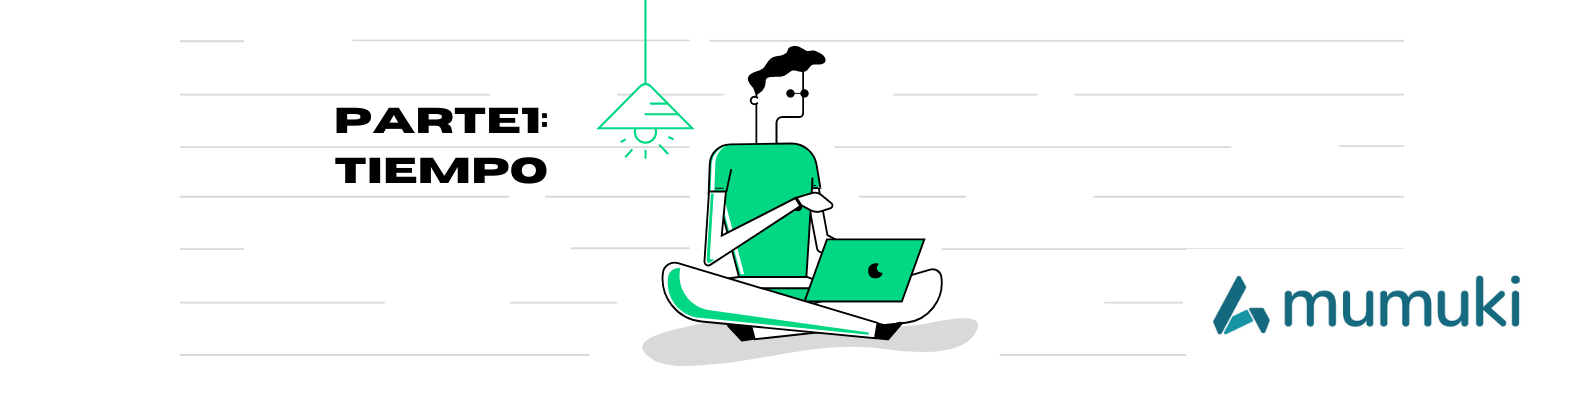

# **5. Tiempo invertido en el recorrido por persona. **

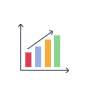Cantidad envios por día.
A continuación se agrupa por periodo, donde tenemos la cantidad de envios, la cantidad de ejercicios y la cantidad de estudiante. 

In [17]:
df_Periodo=df_mumuki.groupby(['Periodo'], as_index=False).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x))),'student_uid': (lambda x: len(set(x)))}).rename(columns={'id_exercise':'cant_envios','exercise_name':'cant_ejercicios_unicos','student_uid':'cant_student'})

In [18]:
df_Periodo

,Periodo,cant_envios,cant_ejercicios_unicos,cant_student
0,2019-08,2,2,1
1,2019-09,4659,40,53
2,2019-10,2258,40,42
3,2019-11,580,40,11
4,2019-12,23,7,1
5,2020-05,14180,40,93
6,2020-06,2802,40,57
7,2020-07,1034,40,33
8,2020-08,493,40,4
9,2020-09,13409,40,89


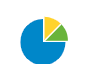 **Gráfica:** Vamos a realizar una grafica que nos permita visualizar la cantidad de envios y de estudiantes por periodo. 

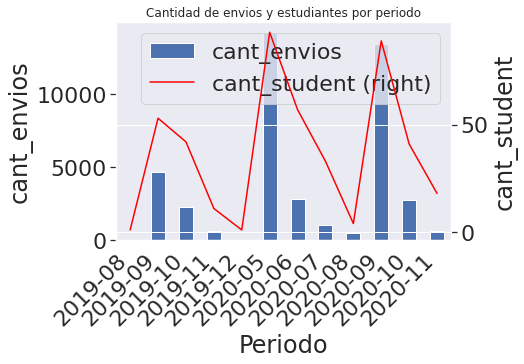

In [19]:
xlabels = df_Periodo['Periodo']

ax=df_Periodo.plot(kind='bar', x='Periodo', y='cant_envios', color='b')
ax2=df_Periodo.plot(kind='line', x='Periodo', y='cant_student', secondary_y=True,color='Red', ax=ax)

ax.set_ylabel('cant_envios')
ax2.set_ylabel('cant_student')

ax.set_xlabel('Periodo')
ax.set_title('Cantidad de envios y estudiantes por periodo', fontsize=12)
ax.set_xticklabels(xlabels, rotation=45, ha='right')
plt.show()

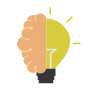 **Conclusión** Se puede observar que en los periodos de mayo y septiembre ocurre la mayor cantidad de envios, que coincide con la mayor cantidad de usuarios activos en la plataforma. Los picos de usuarios que se dan en estos periodos superan los 80 alumnos. Despúes de los picos de envios se puede observar que la cantidad de estudiantes y envios desciende y no se recupera dentro del mismo periodo. Lo que a continuación nos interesa conocer es el tiempo promedio de tiempo de dicado por parte de los estudiantes y el promedio de avance, para entender si durante esos periodos la cantidad de alumnos que completan el recorrido de quienes abandonan o continuan superando los 30 dias de los meses mencionados. 

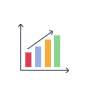 A continuacion se agrupa por estudiante, se contabiliza la cantidad de envios, de ejericios y de dias por estudiante.



In [80]:
df_mumuki['created_at'] = df_mumuki['submission_created_at']
df_student = df_mumuki.groupby(['student_uid'], as_index=True).agg({'id_exercise':'count','exercise_name': (lambda x: len(set(x))),'submission_created_at':'min','created_at':'max'}).rename(columns={'id_exercise':'cant_envios','exercise_name':'cant_ejercicios_unicos','submission_created_at':'f_primer_envio','created_at':'f_ultimo_envio'})
df_student['tiempo_invertido'] = pd.to_datetime(df_student['f_ultimo_envio'])-pd.to_datetime(df_student['f_primer_envio'])
df_student['tiempo_invertido_horas'] = round((pd.to_datetime(df_student['f_ultimo_envio'])-pd.to_datetime(df_student['f_primer_envio'])).dt.total_seconds() / 3600.0,2) 
df_student['tiempo_invertido_dias'] = round(df_student['tiempo_invertido_horas']/24,4)

df_student.sort_values(by=['tiempo_invertido_dias'],ascending = False)

,cant_envios,cant_ejercicios_unicos,f_primer_envio,f_ultimo_envio,tiempo_invertido,tiempo_invertido_horas,tiempo_invertido_dias
student_uid,,,,,,,
250,268,40,2020-07-15 00:20:53.522,2020-10-15 14:36:40.650,92 days 14:15:47.128000,2222.26,92.5942
260,222,40,2020-09-07 12:54:18.781,2020-11-23 20:15:28.657,77 days 07:21:09.876000,1855.35,77.3062
355,15,8,2020-05-26 14:11:01.786,2020-08-03 19:40:07.416,69 days 05:29:05.630000,1661.48,69.2283
319,196,40,2020-09-14 20:02:24.818,2020-11-21 15:17:26.661,67 days 19:15:01.843000,1627.25,67.8021
272,212,40,2020-09-07 22:34:19.641,2020-11-13 17:30:12.734,66 days 18:55:53.093000,1602.93,66.7888
...,...,...,...,...,...,...,...
131,6,1,2019-10-02 13:50:16.838,2019-10-02 13:52:02.143,0 days 00:01:45.305000,0.03,0.0012
238,5,1,2020-05-29 01:50:32.731,2020-05-29 01:52:15.449,0 days 00:01:42.718000,0.03,0.0012
358,6,1,2020-05-16 18:49:13.480,2020-05-16 18:50:49.407,0 days 00:01:35.927000,0.03,0.0012


In [21]:
df_student.describe()

,cant_envios,cant_ejercicios_unicos,tiempo_invertido,tiempo_invertido_horas,tiempo_invertido_dias
count,272.000000,272.000000,272,272.000000,272.000000
mean,157.297794,31.246324,21 days 02:55:26.242948529,506.923603,21.121816
std,92.938675,13.252375,19 days 17:47:43.445727210,473.795174,19.741464
min,3.000000,1.000000,0 days 00:01:26.519000,0.020000,0.000800
25%,85.750000,22.750000,6 days 23:12:32.978500,167.207500,6.966975
50%,147.000000,40.000000,14 days 03:57:49.421000,339.965000,14.165200
75%,217.250000,40.000000,34 days 10:07:16.944250,826.122500,34.421775
max,391.000000,40.000000,92 days 14:15:47.128000,2222.260000,92.594200


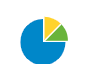 **Gráfica** Vamos a realizar un histograma para visualizar la distribución de los dato de la variable dias invertidos por estudiante.

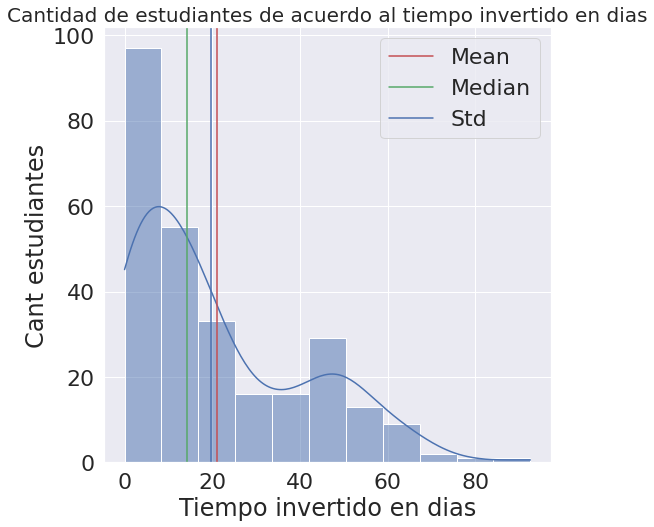

In [22]:
mean_tiem_t = df_student['tiempo_invertido_dias'].mean()
median_tiem_t = df_student['tiempo_invertido_dias'].median()
std_tiem_t = df_student['tiempo_invertido_dias'].std()

plt.figure(figsize=(8, 8))
ax=seaborn.histplot(df_student['tiempo_invertido_dias'] , kde=True)

ax.set_xlabel('Tiempo invertido en dias')
ax.set_ylabel('Cant estudiantes')
ax.set_title('Cantidad de estudiantes de acuerdo al tiempo invertido en dias', fontsize=20)
ax.axvline(mean_tiem_t, color='r', linestyle='-',label='Mean')
ax.axvline(median_tiem_t, color='g', linestyle='-',label='Median')
ax.axvline(std_tiem_t, color='b', linestyle='-',label='Std')
plt.legend(loc='upper right')

plt.show()

In [23]:
print('Media', mean_tiem_t, 'Mediana', median_tiem_t, 'Desvio', std_tiem_t)


Media 21.121816176470592 Mediana 14.165199999999999 Desvio 19.741464293431097


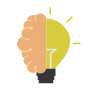 **Conclusión:** Se puede observar que la media de dias invertidos en la plataforma mumuki es de 21 dias con un desvio de 19,7. La cantidad de dias invertidos se encuentra agrupado hacia a la izquierda y presenta una mayor dispersion hacia la derecha, lo que tambien es indicado por que la mediana toma un valor mayor que la media. El valor que toma la mediana es de 14.16 dias, lo que indica que el 50% de los estudiantes  realizan todos sus envios en menos de es tiempo.   

In [83]:
def set_grupo_ejercicio_unico(cant_ejercicios_unicos):
  if (cant_ejercicios_unicos == 40):
        return 'Completo'
  else:
        return "Deserto"

In [94]:
df_student['Avance'] = df_student['cant_ejercicios_unicos'].apply(set_grupo_ejercicio_unico)


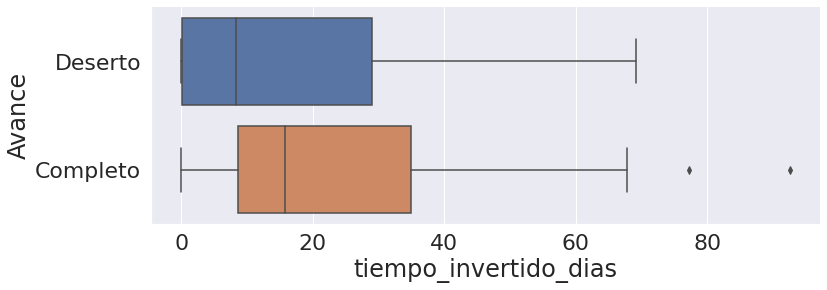

In [103]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(data=df_student, x='tiempo_invertido_dias', y='Avance')
seaborn.despine()

In [101]:
df_tiempo_recorrido=df_student.groupby('Avance')['tiempo_invertido_dias'].agg(Promedio='mean', Desvio='std', Mediana='median')
df_tiempo_recorrido

,Promedio,Desvio,Mediana
Avance,,,
Completo,23.911288,19.543517,15.8021
Deserto,17.426362,19.474022,8.2917


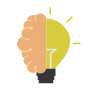 **Conclusión:** El grupo de estudiantes que realizó el recorrido completo invirtio más tiempo en la plataforma, que aquellos que desertaron. El 50% de los estudiantes que realizo envios en todos los ejercicios uso un tiempo de 15.8 días, frente a los 8 días que utilizaron el 50% de los alumnos que abandonaron. 

## *6. Tiempo invertido por envios por estudiante.*


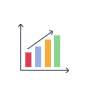 
A continuación se desea calcular la cantidad de horas entre los envios, realizando la relación entre la cantidad de horas, entre el primer envío y el último, sobre el total de envios. 

In [105]:
df_student['avg_tiempo'] = df_student['tiempo_invertido_horas']/df_student['cant_envios']
df_student

,cant_envios,cant_ejercicios_unicos,f_primer_envio,f_ultimo_envio,tiempo_invertido,tiempo_invertido_horas,tiempo_invertido_dias,Ejercicios_unicos_count,Avance,avg_tiempo
student_uid,,,,,,,,,,
76,89,36,2019-08-30 13:17:17.700,2019-10-16 23:09:51.808,47 days 09:52:34.108000,1137.88,47.4117,Deserto,Deserto,12.785169
77,186,40,2019-09-04 01:29:22.351,2019-09-23 13:26:40.846,19 days 11:57:18.495000,467.96,19.4983,Completo,Completo,2.515914
78,84,9,2019-09-04 02:53:01.099,2019-09-28 20:24:59.484,24 days 17:31:58.385000,593.53,24.7304,Deserto,Deserto,7.065833
79,95,22,2019-09-05 14:24:31.797,2019-10-23 13:20:51.240,47 days 22:56:19.443000,1150.94,47.9558,Deserto,Deserto,12.115158
80,125,19,2019-09-23 12:21:30.215,2019-09-23 14:57:59.526,0 days 02:36:29.311000,2.61,0.1088,Deserto,Deserto,0.020880
...,...,...,...,...,...,...,...,...,...,...
355,15,8,2020-05-26 14:11:01.786,2020-08-03 19:40:07.416,69 days 05:29:05.630000,1661.48,69.2283,Deserto,Deserto,110.765333
358,6,1,2020-05-16 18:49:13.480,2020-05-16 18:50:49.407,0 days 00:01:35.927000,0.03,0.0012,Deserto,Deserto,0.005000
359,38,16,2020-05-14 22:42:31.975,2020-05-29 02:25:47.078,14 days 03:43:15.103000,339.72,14.1550,Deserto,Deserto,8.940000


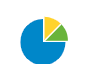 **Gráfica** Vamos a realizar un histograma para visualizar la distribución de los datos de la variable .

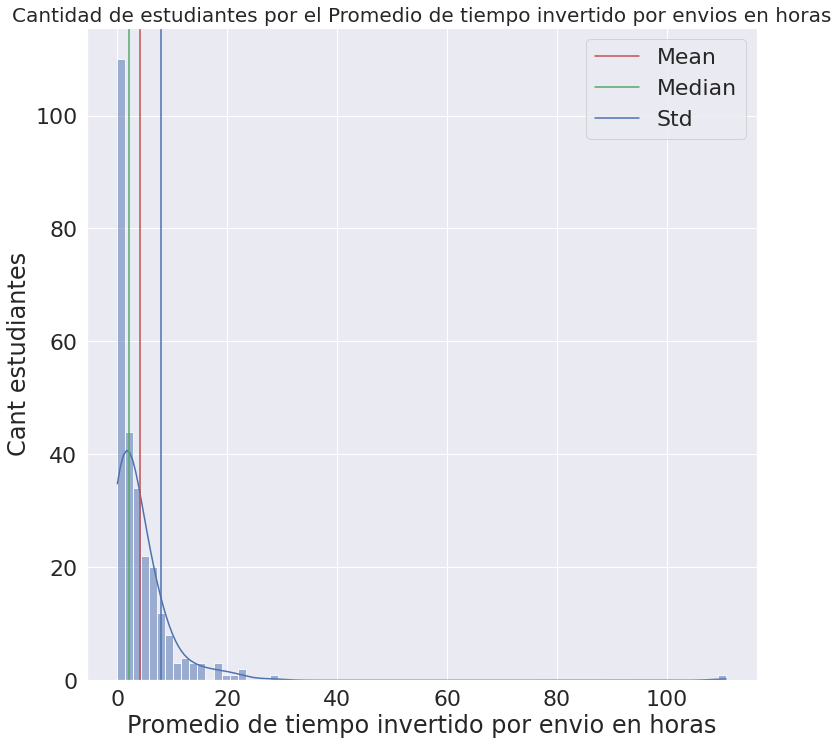

In [106]:
mean_tiem_h = df_student['avg_tiempo'].mean()
median_tiem_h = df_student['avg_tiempo'].median()
std_tiem_h = df_student['avg_tiempo'].std()

plt.figure(figsize=(12, 12))
ax=seaborn.histplot(df_student['avg_tiempo'] , kde=True)

ax.set_xlabel('Promedio de tiempo invertido por envio en horas')
ax.set_ylabel('Cant estudiantes')
ax.set_title('Cantidad de estudiantes por el Promedio de tiempo invertido por envios en horas', fontsize=20)
ax.axvline(mean_tiem_h, color='r', linestyle='-',label='Mean')
ax.axvline(median_tiem_h, color='g', linestyle='-',label='Median')
ax.axvline(std_tiem_h, color='b', linestyle='-',label='Std')
plt.legend(loc='upper right')

plt.show()

In [26]:
print(mean_tiem_h,median_tiem_h,std_tiem_h)

4.181872233527507 2.100288244213658 7.914019064095448


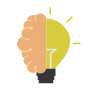**Conclusión:** Se puede observar que los datos se agrupan a la derecha y quedan más distribución a la izquierda. La mediana tiene valor de 2.1, lo que nos permite concluir que el 50% de alumnos utilizan la plataforma menos de 2.1 horas en el promedio de dias mencionado anteriormente.

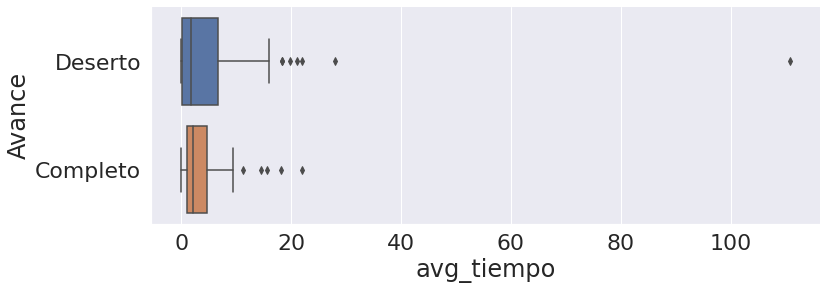

In [107]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(data=df_student, x='avg_tiempo', y='Avance')
seaborn.despine()

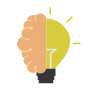 **Conclusión:** El tiempo promedio entre envios es mayor en el grupo que deserta. Podemos concluir que hasta donde poodemos obervar en los datos en este punnto del análisis, los estudiantes que desertan dedican menos tiempo total a la plataforma con más tiempo entre los envios, frente a los que completan el recorrido. A fututo esta conclusión merece analisis estadisticas mas finos para validar la significancias de las diferencias entre ambos. 

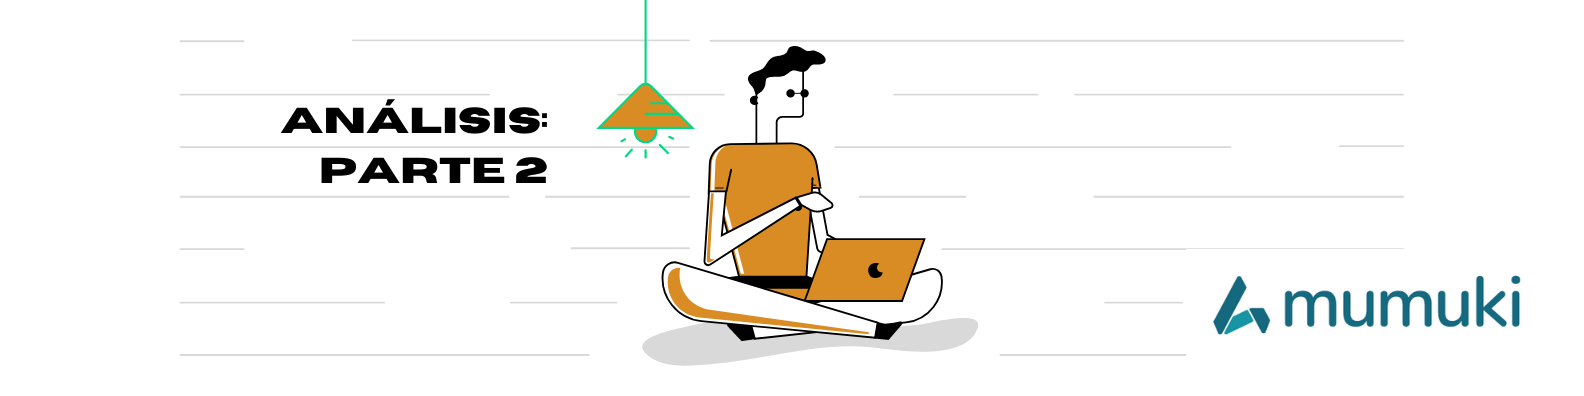

# **8. Categorizar a los alumnos en dos grupos, según la cantidad de envios correctos/incorrectos.**

Se plantea la existencia de dos grupos según el siguiente comportamiento:
Cantidad de envios correctos / Cantidad de envios incorrectos.
Acorde al mismo se agrupan a los alumnos.

1.   Grupo A: Los alumnos del **GRUPO A ** son aquellos que tienen más envios correctos que incorrectos o igual cantidad de ambos.
2.   Grupo B: Los alumnos del **GRUPO B ** son aquellos que tienen más envios incorrectos que correctos. 

***Justificación***: Se clasificaron de la siguiente forma acorde al supuesto de que existen dos tipos de comportamiento frente a las entregas de las actividades. Los planificadores, que se caraterizan por realizar análisis previos a las entregas y de aquellos alumnos que, a prueba y error, aprenden hasta llegar a un envio correcto. El grupo a se identifica como los planificadores y el grupo b no. 

**Hipotesis** Partimos nuestro analisis del supuesto que el grupo_b tiene un promedio de recorrido menor al grupo_a.

In [27]:
df_promedio_por_ej_por_std=df_mumuki.groupby('student_uid').Estatus.value_counts() \
  .unstack(fill_value=0).reset_index()
df_promedio_por_ej_por_std

Estatus,student_uid,no_paso,paso
0,76,42,47
1,77,91,95
2,78,69,15
3,79,61,34
4,80,96,29
...,...,...,...
267,355,13,2
268,358,5,1
269,359,19,19
270,362,3,0


In [139]:
df_promedio_por_ej_por_std['grupo']=[ 'grupo_b' if no_paso>paso else 'grupo_a' for no_paso,paso,student_uid in zip(df_promedio_por_ej_por_std['no_paso'],df_promedio_por_ej_por_std['paso'],df_promedio_por_ej_por_std['student_uid'])]

In [140]:
df_promedio_por_ej_por_std.grupo.count()

272

In [141]:
#creacion de los grupos
grupo_a=df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['grupo']=='grupo_a']
grupo_b=df_promedio_por_ej_por_std[df_promedio_por_ej_por_std['grupo']=='grupo_b']


In [147]:
grupo_a.grupo.count()


50

In [148]:
grupo_b.grupo.count()

222

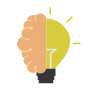Luego de agrupar y realizar los conteos correspondientes obtemos, que 50 alumnos pertenecen al grupo a y 222 al grupo b. 

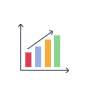
GRUPO A:
UID de estudiante con sus respectivos envios correctos como incorrectos. 
Orden= Cantidad de envios correctos

In [149]:
grupo_a.sort_values(by=['paso'], ascending=[False])[50:]


Estatus,student_uid,no_paso,paso,grupo_submission_status,grupo


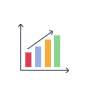
GRUPO B:
UID de estudiante con sus respectivos envios correctos como incorrectos. 
Orden= Cantidad de envios correctos.

In [150]:
grupo_b.sort_values(by=['paso'], ascending=[False])[50:]


Estatus,student_uid,no_paso,paso,grupo_submission_status,grupo
143,225,138,61,grupo_b,grupo_b
181,266,287,61,grupo_b,grupo_b
38,115,86,61,grupo_b,grupo_b
174,258,284,61,grupo_b,grupo_b
169,252,120,61,grupo_b,grupo_b
...,...,...,...,...,...
45,122,6,1,grupo_b,grupo_b
155,238,4,1,grupo_b,grupo_b
65,143,3,0,grupo_b,grupo_b
270,362,3,0,grupo_b,grupo_b


## **9. Promedio de envios de cada grupo y promedio de ejercicios resultos por grupo.** 

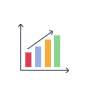Vamos a proceder a calcular el porcentaje de envios de cada grupo de los envios totales. 

In [151]:
promedio_envios_grupo_a= ((grupo_a.paso.sum() + grupo_a.no_paso.sum())/ df_mumuki.Estatus.count())*100
promedio_envios_grupo_a

8.498305480892835

In [152]:
promedio_envios_grupo_b= ((grupo_b.paso.sum() + grupo_b.no_paso.sum())/ df_mumuki.Estatus.count())*100
promedio_envios_grupo_b

91.50169451910716

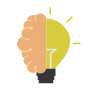 **Conclusión:** Del total de envios el 91,5% corresponde al GRUPO B y el 8,5% al GRUPO A. Esto implica el que grupo b realiza una cantidad mucho mayor que el grupo b. 

# **Promedio de ejercicios correctos por grupo.**

Para poder trabajar mejor unimos el dataframe original con el data que clasifica a los alumnos en grupos.

In [153]:
df_unido=pd.merge(df_mumuki, df_promedio_por_ej_por_std, on='student_uid')
df_unido


,Unnamed: 0,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,Estatus,Date,Periodo,Year,Month,Week,DayNroWeek,DayNameWeek,Time,Hora,Minute,lesson_number,exercise_index_per_lesson,id_exercise,created_at,Estatus_numerico,Ejercicios_unicos_count,Avance,no_paso,paso,grupo_submission_status,grupo
0,0,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",paso,2019-08-30,2019-08,2019,8,35,4,Friday,13:17:17.700000,13,17,1,1,1,2019-08-30 13:17:17.700,1,NaN,NaN,42,47,grupo_a,grupo_a
1,1066,"Funciones, uso","[{'binding': 'anterior_del_triple', 'inspectio...",mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1069,76,def anterior(numero):\r\n return numero - 1\r...,2019-08-30 13:40:26.023,failed,0,"[{'title': 'Anterior1 es 0', 'status': 'passed...",no_paso,2019-08-30,2019-08,2019,8,35,4,Friday,13:40:26.023000,13,40,1,2,2,2019-08-30 13:40:26.023,0,NaN,NaN,42,47,grupo_a,grupo_a
2,1067,"Funciones, uso",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1070,76,def anterior(numero):\r\n return numero - 1\r...,2019-09-10 20:00:32.156,passed,1,"[{'title': 'Anterior1 es 0', 'status': 'passed...",paso,2019-09-10,2019-09,2019,9,37,1,Tuesday,20:00:32.156000,20,0,1,2,2,2019-09-10 20:00:32.156,1,NaN,NaN,42,47,grupo_a,grupo_a
3,2429,Los premios,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2434,76,def medalla_segun_puesto(pos):\r\n if pos == ...,2019-09-26 19:35:23.737,passed,0,"[{'title': 'Medalla segun puesto 0', 'status':...",paso,2019-09-26,2019-09,2019,9,39,3,Thursday,19:35:23.737000,19,35,1,14,14,2019-09-26 19:35:23.737,1,NaN,NaN,42,47,grupo_a,grupo_a
4,3675,Libros de la buena memoria,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3681,76,def es_par(numero):\r\n return numero % 0 == 0,2019-09-10 20:08:45.875,failed,0,"[{'title': 'Es par 1 es falso', 'status': 'fai...",no_paso,2019-09-10,2019-09,2019,9,37,1,Tuesday,20:08:45.875000,20,8,1,6,6,2019-09-10 20:08:45.875,0,NaN,NaN,42,47,grupo_a,grupo_a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42780,33901,Cartelitos óptimos,"[{'binding': '*', 'inspection': 'Declares:=esc...",mumukiproject/mumuki-guia-python-practica-func...,"File ""solucion.py"", line 9\n return titul...",29872,363,"def escribir_cartelito_optimo (titulo, nombre,...",2020-10-06 14:45:08.643,errored,7,[],no_paso,2020-10-06,2020-10,2020,10,41,1,Tuesday,14:45:08.643000,14,45,2,8,24,2020-10-06 14:45:08.643,0,NaN,NaN,18,1,grupo_b,grupo_b
42781,33902,Cartelitos óptimos,"[{'binding': '*', 'inspection': 'Declares:=esc...",mumukiproject/mumuki-guia-python-practica-func...,"File ""solucion.py"", line 9\n return titul...",29873,363,"def escribir_cartelito_optimo (titulo, nombre,...",2020-10-06 14:45:27.866,errored,8,[],no_paso,2020-10-06,2020-10,2020,10,41,1,Tuesday,14:45:27.866000,14,45,2,8,24,2020-10-06 14:45:27.866,0,NaN,NaN,18,1,grupo_b,grupo_b
42782,33903,Cartelitos óptimos,"[{'binding': '*', 'inspection': 'Declares:=esc...",mumukiproject/mumuki-guia-python-practica-func...,"File ""solucion.py"", line 9\n return titul...",29874,363,"def escribir_cartelito_optimo (titulo, nombre,...",2020-10-06 14:45:35.999,errored,9,[],no_paso,2020-10-06,2020-10,2020,10,41,1,Tuesday,14:45:35.999000,14,45,2,8,24,2020-10-06 14:45:35.999,0,NaN,NaN,18,1,grupo_b,grupo_b
42783,33904,Cartelitos óptimos,[],mumukiproject/mumuki-guia-python-practica-func...,"File ""solucion.py"", line 9\n return titul...",29875,363,"def escribir_cartelito_optimo (titulo, nombre,...",2020-10-06 14:45:54.872,errored,10,[],no_paso,2020-10-06,2020-10,2020,10,41,1,Tuesday,14:45:54.872000,14,45,2,8,24,2020-10-06 14:45:54.872,0,NaN,NaN,18,1,grupo_b,grupo_b


In [109]:
df_unido

,Unnamed: 0,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,Estatus,Date,Periodo,Year,Month,Week,DayNroWeek,DayNameWeek,Time,Hora,Minute,lesson_number,exercise_index_per_lesson,id_exercise,created_at,Estatus_numerico,Ejercicios_unicos_count,Avance,no_paso,paso,grupo_submission_status
0,0,"Funciones, declaración / No tan distintos",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",paso,2019-08-30,2019-08,2019,8,35,4,Friday,13:17:17.700000,13,17,1,1,1,2019-08-30 13:17:17.700,1,NaN,NaN,42,47,grupo_a
1,1066,"Funciones, uso","[{'binding': 'anterior_del_triple', 'inspectio...",mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1069,76,def anterior(numero):\r\n return numero - 1\r...,2019-08-30 13:40:26.023,failed,0,"[{'title': 'Anterior1 es 0', 'status': 'passed...",no_paso,2019-08-30,2019-08,2019,8,35,4,Friday,13:40:26.023000,13,40,1,2,2,2019-08-30 13:40:26.023,0,NaN,NaN,42,47,grupo_a
2,1067,"Funciones, uso",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1070,76,def anterior(numero):\r\n return numero - 1\r...,2019-09-10 20:00:32.156,passed,1,"[{'title': 'Anterior1 es 0', 'status': 'passed...",paso,2019-09-10,2019-09,2019,9,37,1,Tuesday,20:00:32.156000,20,0,1,2,2,2019-09-10 20:00:32.156,1,NaN,NaN,42,47,grupo_a
3,2429,Los premios,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2434,76,def medalla_segun_puesto(pos):\r\n if pos == ...,2019-09-26 19:35:23.737,passed,0,"[{'title': 'Medalla segun puesto 0', 'status':...",paso,2019-09-26,2019-09,2019,9,39,3,Thursday,19:35:23.737000,19,35,1,14,14,2019-09-26 19:35:23.737,1,NaN,NaN,42,47,grupo_a
4,3675,Libros de la buena memoria,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3681,76,def es_par(numero):\r\n return numero % 0 == 0,2019-09-10 20:08:45.875,failed,0,"[{'title': 'Es par 1 es falso', 'status': 'fai...",no_paso,2019-09-10,2019-09,2019,9,37,1,Tuesday,20:08:45.875000,20,8,1,6,6,2019-09-10 20:08:45.875,0,NaN,NaN,42,47,grupo_a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42780,33901,Cartelitos óptimos,"[{'binding': '*', 'inspection': 'Declares:=esc...",mumukiproject/mumuki-guia-python-practica-func...,"File ""solucion.py"", line 9\n return titul...",29872,363,"def escribir_cartelito_optimo (titulo, nombre,...",2020-10-06 14:45:08.643,errored,7,[],no_paso,2020-10-06,2020-10,2020,10,41,1,Tuesday,14:45:08.643000,14,45,2,8,24,2020-10-06 14:45:08.643,0,NaN,NaN,18,1,grupo_b
42781,33902,Cartelitos óptimos,"[{'binding': '*', 'inspection': 'Declares:=esc...",mumukiproject/mumuki-guia-python-practica-func...,"File ""solucion.py"", line 9\n return titul...",29873,363,"def escribir_cartelito_optimo (titulo, nombre,...",2020-10-06 14:45:27.866,errored,8,[],no_paso,2020-10-06,2020-10,2020,10,41,1,Tuesday,14:45:27.866000,14,45,2,8,24,2020-10-06 14:45:27.866,0,NaN,NaN,18,1,grupo_b
42782,33903,Cartelitos óptimos,"[{'binding': '*', 'inspection': 'Declares:=esc...",mumukiproject/mumuki-guia-python-practica-func...,"File ""solucion.py"", line 9\n return titul...",29874,363,"def escribir_cartelito_optimo (titulo, nombre,...",2020-10-06 14:45:35.999,errored,9,[],no_paso,2020-10-06,2020-10,2020,10,41,1,Tuesday,14:45:35.999000,14,45,2,8,24,2020-10-06 14:45:35.999,0,NaN,NaN,18,1,grupo_b
42783,33904,Cartelitos óptimos,[],mumukiproject/mumuki-guia-python-practica-func...,"File ""solucion.py"", line 9\n return titul...",29875,363,"def escribir_cartelito_optimo (titulo, nombre,...",2020-10-06 14:45:54.872,errored,10,[],no_paso,2020-10-06,2020-10,2020,10,41,1,Tuesday,14:45:54.872000,14,45,2,8,24,2020-10-06 14:45:54.872,0,NaN,NaN,18,1,grupo_b


Vamos a calcular el promedio de envios correctos por grupo y su desvio estandar.

In [154]:
medias_envio_grupos=df_unido.groupby('grupo')['Estatus_numerico'].agg(Promedio='mean', Desvio='std')
medias_envio_grupos

,Promedio,Desvio
grupo,,
grupo_a,0.581133,0.493441
grupo_b,0.274030,0.446030


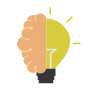 **Conclusión:** El grupo a tienen un promedio de envios correctos mayor al grupo b, de hecho es casi el doble. Esto pareceria indicar que los alumnos del grupo_a son mas acertivos frentea su desempeno y podria indicar conocimiento o esfuerzos previos a los envios. Es interesante preguntarnos si este grupo tiene una mayor o menor tolerancia a la frustración y si esto condiciona su avance. 

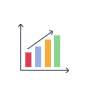A continuación se calcula la cantidad de ejericios con al menos intento  por estudiantes de cada grupo y posteriormente se calcula la media de intentos ejercicios resultos, desvio y mediana para identificar el promedio de avance de cada grupo y la distribución. 

In [155]:
df_cant_ejer=df_unido.groupby(['grupo', 'student_uid'], as_index=True).agg({'exercise_name': (lambda x: len(set(x)))}).rename(columns={'exercise_name':'cant_ejercicios_unicos',})

In [156]:
df_cant_ejer

cant_ejercicios_unicos
grupo   student_uid                        
grupo_a 76                               36
        77                               40
        95                                6
        96                                8
        100                              17
...                                     ...
grupo_b 352                               9
        355                               8
        358                               1
        362                               1
        363                               3

[272 rows x 1 columns]

In [160]:
df_medias_ejer=df_cant_ejer.groupby('grupo')['cant_ejercicios_unicos'].agg(Promedio='mean', Desvio='std', Mediana='median')
df_medias_ejer

,Promedio,Desvio,Mediana
grupo,,,
grupo_a,27.920000,14.298337,38.5
grupo_b,31.995495,12.921447,40.0


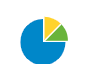 **Gráfica:** A continuación se observan los datos en grafico tipo histograma para ver la distribucion diferenciada por grupo.

In [161]:
df_cant_ejer_group_reset=df_cant_ejer.reset_index()


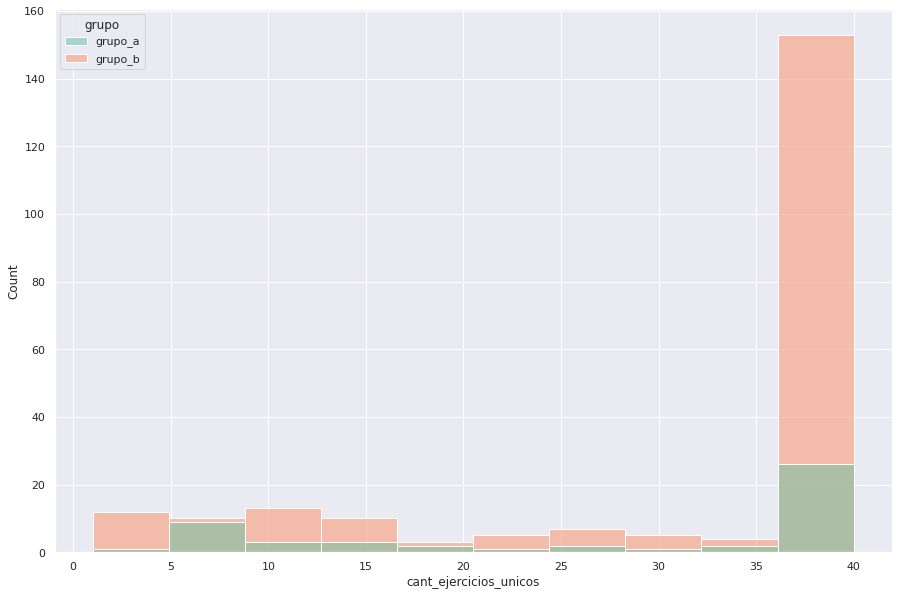

In [158]:
fig=plt.figure(figsize=(15,10))
seaborn.histplot(data=df_cant_ejer, 
stat='count',  
x='cant_ejercicios_unicos',  
hue='grupo',   
multiple='layer',   
kde_kws={'bw_adjust':5},   
line_kws={'linewidth':7},
palette='Set2')
plt.xticks(rotation=0);

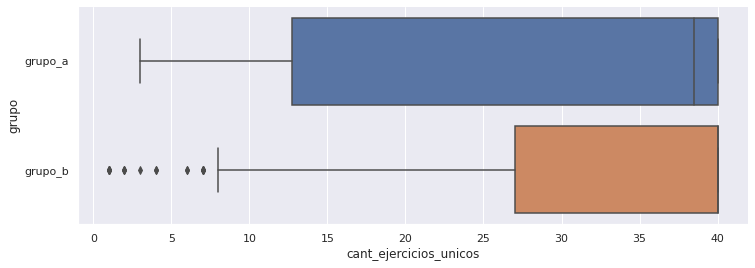

In [162]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(data=df_cant_ejer_group_reset, x='cant_ejercicios_unicos', y='grupo')
seaborn.despine()

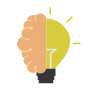 Con los datos estadísticos calculados podemos concluir que el promedio de avance de ambos grupos es similar, si bien el grupo_b tiene un mejor 'avance', ya que más del 50% de los estudiantes completan el recorrido frente al grupo_a cuya mediana es de 38. Esto rechaza nuestra hipotesis inicial y nos genera nuevos interrogante, es sifnificativa esta difrencias entre ambos grupos? los alumnos del grupo_b presentan un mayor avance respecto a al grupo_a por que son mas tolerantes al fracaso y no se ve sus emociones afectadas por intentos incorrectos? 

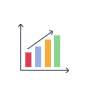
A continuación queremos conocer:
1. Analizar la cantidad de alumnos de cada grupo que completan el recorrido de los que no. 
2. Analizar el tiempo promedio por grupo.
2. Arribar a conclusiones para futuros analisis.


In [164]:
def set_grupo_ejercicio_unico(cant_ejercicios_unicos):
  if (cant_ejercicios_unicos == 40):
        return 'Completo'
  else:
        return "Deserto"

In [165]:
df_cant_ejer['Avance'] = df_cant_ejer['cant_ejercicios_unicos'].apply(set_grupo_ejercicio_unico)


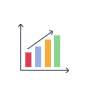 
A continuación vamos a calcular la cantidad de alumnos que complentan el recorrido de los ejercicios, con al menos un envio, diferenciados por grupo.

In [166]:
df_cant_ejer_group=df_cant_ejer.groupby(['grupo', 'Avance'], as_index=True)['Avance'].count().unstack()
df_cant_ejer_group

Avance,Completo,Deserto
grupo,,
grupo_a,25,25
grupo_b,130,92


In [167]:
df_cant_ejer_group_reset=df_cant_ejer.reset_index()


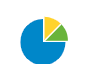 **Grafico** Se van a realizar dos graficos de torta, separada por grupos, para visualizar el proncetaje de alumnos que completan el recorrdido de los que no. 

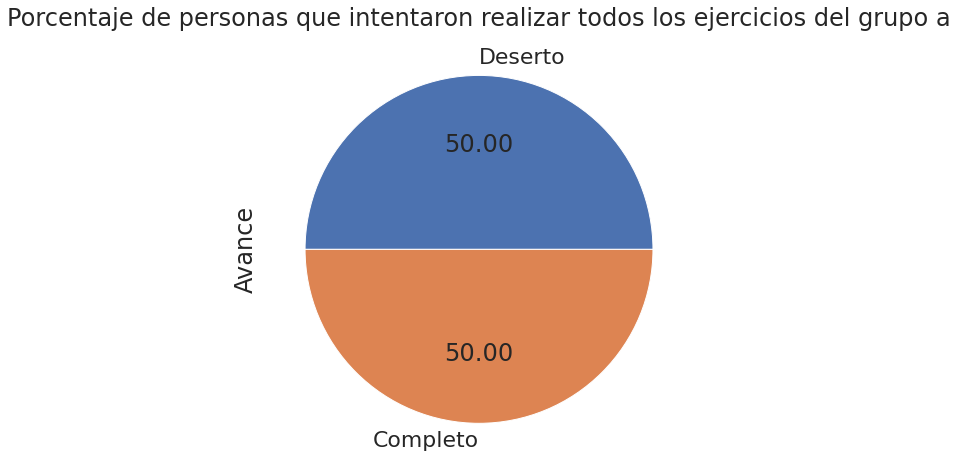

In [168]:
sns.set(font_scale = 2)
plot = df_cant_ejer_group_reset[df_cant_ejer_group_reset['grupo']== 'grupo_a']['Avance'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(8, 8),
                                            title='Porcentaje de personas que intentaron realizar todos los ejercicios del grupo a')


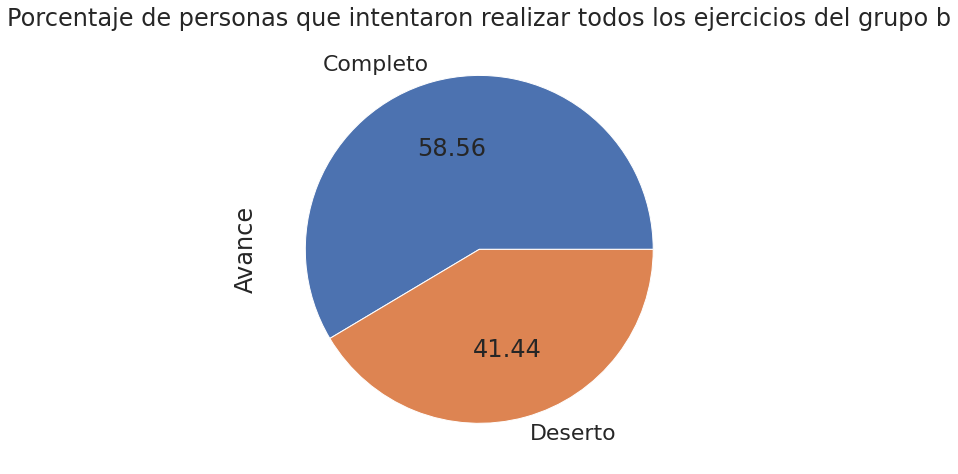

In [169]:
sns.set(font_scale = 2)
plot = df_cant_ejer_group_reset[df_cant_ejer_group_reset['grupo']== 'grupo_b']['Avance'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(8, 8),
                                            title='Porcentaje de personas que intentaron realizar todos los ejercicios del grupo b')

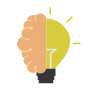**Conclusión** En el grupo a encontramos que un 50% de los alumnos completan el recorrido, frente a un 58,6% del grupo_b. Lo que permite suponer que los alumnos del grupo_b parecen tener una menor probabilidad de deserción y una mayor tolerancia a la frustación (a validar estadisticamente en trabajo futuro). Esta última conclusión es un replanteo del supuesto inicial, donde planteamos que el grupo_b tendria un menor promedio de avance y menor cantidad de alumnos que completen el recorrido. A futuro se deberian realizar otros test para validar la significancia estadisticas de las diferencias encontradas entre los grupos. 

In [170]:
df_unido_grupo_tiempos=pd.merge(df_cant_ejer_group_reset, df_student, on='student_uid')
df_unido_grupo_tiempos

,grupo,student_uid,cant_ejercicios_unicos_x,Avance_x,cant_envios,cant_ejercicios_unicos_y,f_primer_envio,f_ultimo_envio,tiempo_invertido,tiempo_invertido_horas,tiempo_invertido_dias,Ejercicios_unicos_count,Avance_y,avg_tiempo
0,grupo_a,76,36,Deserto,89,36,2019-08-30 13:17:17.700,2019-10-16 23:09:51.808,47 days 09:52:34.108000,1137.88,47.4117,Deserto,Deserto,12.785169
1,grupo_a,77,40,Completo,186,40,2019-09-04 01:29:22.351,2019-09-23 13:26:40.846,19 days 11:57:18.495000,467.96,19.4983,Completo,Completo,2.515914
2,grupo_a,95,6,Deserto,26,6,2019-09-23 12:33:58.902,2019-09-23 14:42:53.928,0 days 02:08:55.026000,2.15,0.0896,Deserto,Deserto,0.082692
3,grupo_a,96,8,Deserto,36,8,2019-09-25 12:15:01.435,2019-09-25 13:22:49.393,0 days 01:07:47.958000,1.13,0.0471,Deserto,Deserto,0.031389
4,grupo_a,100,17,Deserto,53,17,2019-09-25 12:19:54.973,2019-10-14 19:54:50.416,19 days 07:34:55.443000,463.58,19.3158,Deserto,Deserto,8.746792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,grupo_b,352,9,Deserto,81,9,2020-11-10 13:49:38.249,2020-11-10 18:35:49.027,0 days 04:46:10.778000,4.77,0.1987,Deserto,Deserto,0.058889
268,grupo_b,355,8,Deserto,15,8,2020-05-26 14:11:01.786,2020-08-03 19:40:07.416,69 days 05:29:05.630000,1661.48,69.2283,Deserto,Deserto,110.765333
269,grupo_b,358,1,Deserto,6,1,2020-05-16 18:49:13.480,2020-05-16 18:50:49.407,0 days 00:01:35.927000,0.03,0.0012,Deserto,Deserto,0.005000
270,grupo_b,362,1,Deserto,3,1,2019-10-17 14:35:27.705,2019-10-17 14:36:54.224,0 days 00:01:26.519000,0.02,0.0008,Deserto,Deserto,0.006667


In [171]:
tiempo_grupo=df_unido_grupo_tiempos.groupby('grupo')['tiempo_invertido_dias'].agg(Promedio='mean', Desvio='std', Mediana='median')
tiempo_grupo

,Promedio,Desvio,Mediana
grupo,,,
grupo_a,15.803812,17.129367,13.65625
grupo_b,22.319565,20.124691,14.28355


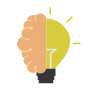**Conclusión** Se puede observar que el grupo_b invierte más tiempo en el recorrido que los los alumnos del grupo_a. Si bien las diferencias entre las medianas son muy pequeñas. El grupo_b parece tener un comportamiento mas heterogeneo con mayor extremos en el tiempo invertido. 